In [6]:
#Title: I-94 Interstate Highway
#Description: Analyze indicators such as weather type, time of the day, time of the week, etc. 
#to see if these indicators contribute to the traffic on I-94
#Goal:Determine a few indicators of heavy traffic on I-94

#Importing Pandas
import pandas as pd

#Reading the file
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [7]:
#Examine the first 5 rows
traffic.head(5) #First 5

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
#Exxamine the last 5 rows
traffic.tail(5) #Last 5

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [9]:
#All info about the dataset
print(traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


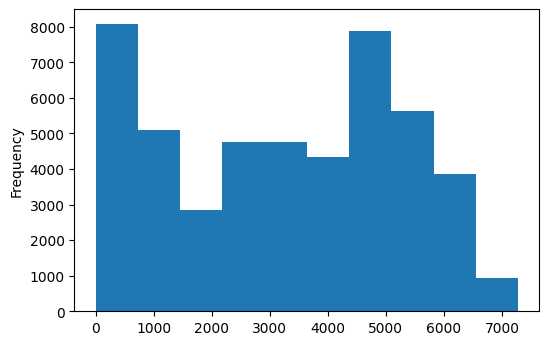

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
#import Matplotlib
import matplotlib.pyplot as plt
#This enables Jupyter to generate graph
%matplotlib inline

#Plot a diagram to examine the distribution of the traffic_volume
traffic['traffic_volume'].plot.hist()
plt.show()

#Describing characteristics of traffic_volume
traffic['traffic_volume'].describe()
#Observation
#The traffic volume is ranged from 0 to 7280 with the average of 2359.1.
#With all the values:
    #25% are 1193
    #50% are 3380
    #75% are 4933

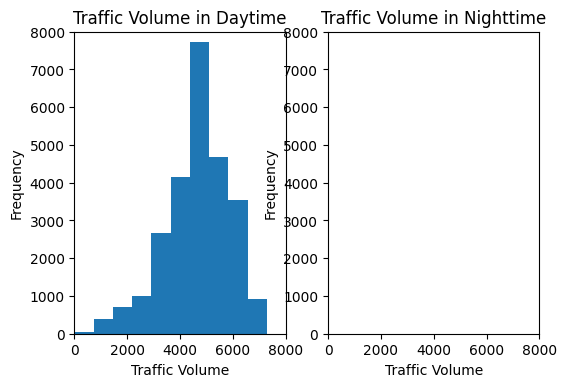

In [11]:
#Making the date_time column to datetime
traffic['date_time']=pd.to_datetime(traffic['date_time'])

#Dividing the dataset into two parts
#From 7am to 7pm
daytime = traffic[(traffic['date_time'].dt.hour>=7) & (traffic['date_time'].dt.hour <=19)]
#From 7pm to 7am
nighttime = traffic[((traffic['date_time'].dt.hour>=19) & (traffic['date_time'].dt.hour <=7))]

#Plot the histogram of traffic_volume for daytime
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Traffic Volume in Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])

#Plot the histogram of traffic_volume for nighttime
plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title('Traffic Volume in Nighttime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([0,8000])
plt.ylim([0,8000])
plt.show()

#Observation
#Most of the traffic are happening during daytime
#There is barely any traffic during nighttime

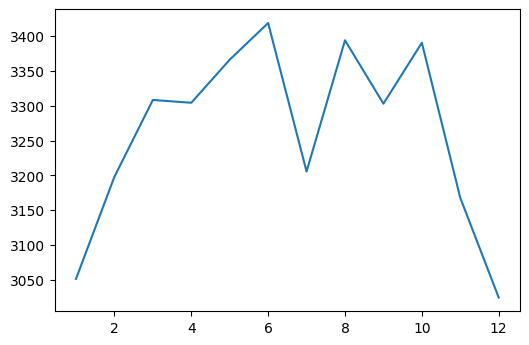

In [12]:
#Creating a new column where each value describe the month when the traffic volumne traffic measurement was taken
traffic['month'] = traffic['date_time'].dt.month
#Group the dataset by the month column with the mean as an aggregate function
by_month = traffic.groupby('month').mean()
by_month['traffic_volume']

#Creating a line plot
plt.plot(by_month['traffic_volume'])
plt.show()

#Traffic volume in June is the highest(summer?)
#Traffic volume in December is the lowest (winter?)

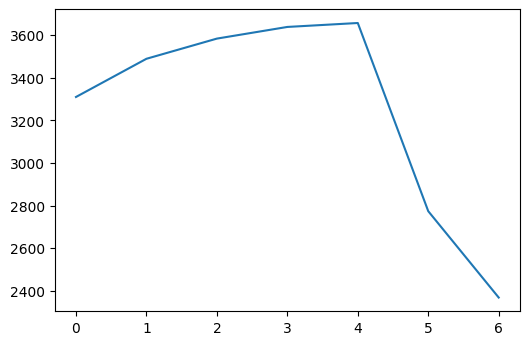

In [13]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

#Creating a line plot
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

#There isn't a lot of traffic on the weekends

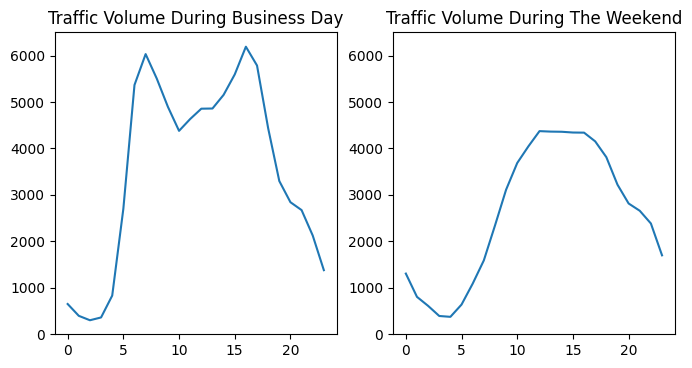

In [14]:
#Creating a new column where each value describe hour when the traffic volumne traffic measurement was taken
traffic['hour'] = traffic['date_time'].dt.hour
#Seperating data to two different categories (business day vs weekend)
bussiness_days = traffic.copy()[traffic['dayofweek'] <= 4] # 4 == Friday
weekend = traffic.copy()[traffic['dayofweek'] >= 5] # 5 == Saturday
#Group the dataset by the hourcolumn with the mean as an aggregate function
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

#print(by_hour_business['traffic_volume'])
#print(by_hour_weekend['traffic_volume'])

#Choosing the size for the graphs
plt.figure(figsize=(8,4))
#Creating the line plot for business days
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic Volume During Business Day')
plt.ylim([0,6500])

#Creating the line plot for weekend
plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume During The Weekend')
plt.ylim([0,6500])
plt.show()

#The traffic volume is high during rush hour on the business days
    #The highest traffic volume is at 7am to 4pm, but there is less traffic from 7am-10am

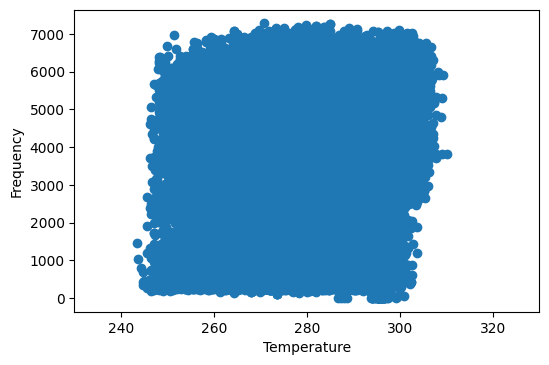

In [15]:
#Finding the correlation between the weather and traffic volume
traffic[['traffic_volume', 'temp','rain_1h', 'snow_1h', 'clouds_all']].corr()['traffic_volume']

#The strongest correlation column is the temp column
#Creating a scatter plot
plt.scatter(traffic['temp'], traffic['traffic_volume'])
plt.xlim([230,330])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

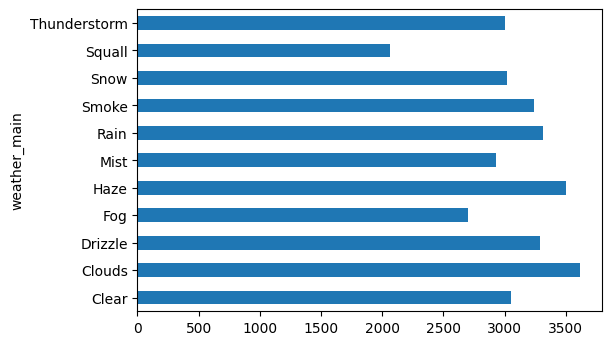

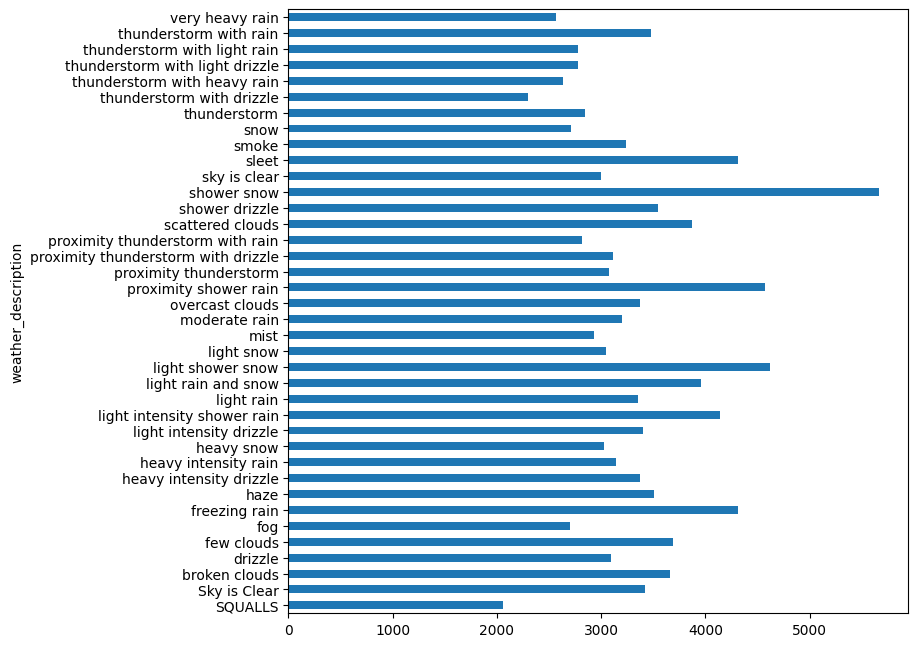

In [19]:
#Calculating the average traffic volume for weather_main and weather_description
by_weather_main = traffic.groupby('weather_main').mean()
by_weather_description = traffic.groupby('weather_description').mean()

#Creating a horizontal bar plot for by_weather_main
by_weather_main['traffic_volume'].plot.barh()
#People are still going out when there are clouds
#People don't go out as much when there is squall
plt.show()
#Creating a horizontal bar plot for by_weather_description
plt.figure(figsize=(8,8))
by_weather_description['traffic_volume'].plot.barh()
plt.show()
#People are still going out when the sky is clear
#People aren't going out when there are squalls

In [ ]:
Conclusion:
    The traffic in the station midway between Minneapolis and Saint Paul analyze
        There is more traffic in business days comparing to the weekends
        There is more traffic in the morning than night
        There is more traffic in the summer time than the winter time
        There is more traffic in the rush hour from 7am to 4pm; however, there is a downtime at 10am
        There is more traffic when sky is clear or there are clouds on the sky
        There is less traffic when there are squalls